c:\Users\varun\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (



Decision Tree (max_depth=default)
Accuracy: 0.517

Classification Report:
                   precision    recall  f1-score   support

  Mildly Anti-GMO       0.44      0.40      0.42        63
   Mildly Pro-GMO       0.49      0.48      0.48        63
Strongly Anti-GMO       0.53      0.59      0.56        54
 Strongly Pro-GMO       0.60      0.62      0.61        58

         accuracy                           0.52       238
        macro avg       0.52      0.52      0.52       238
     weighted avg       0.51      0.52      0.51       238



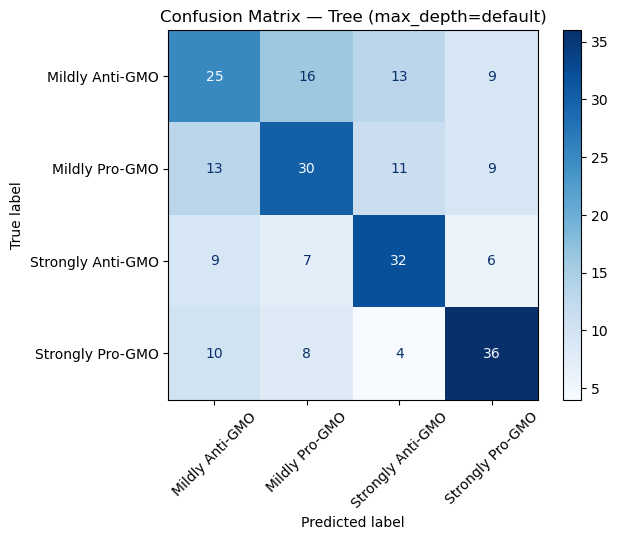

Decision Tree Structure — max_depth=default


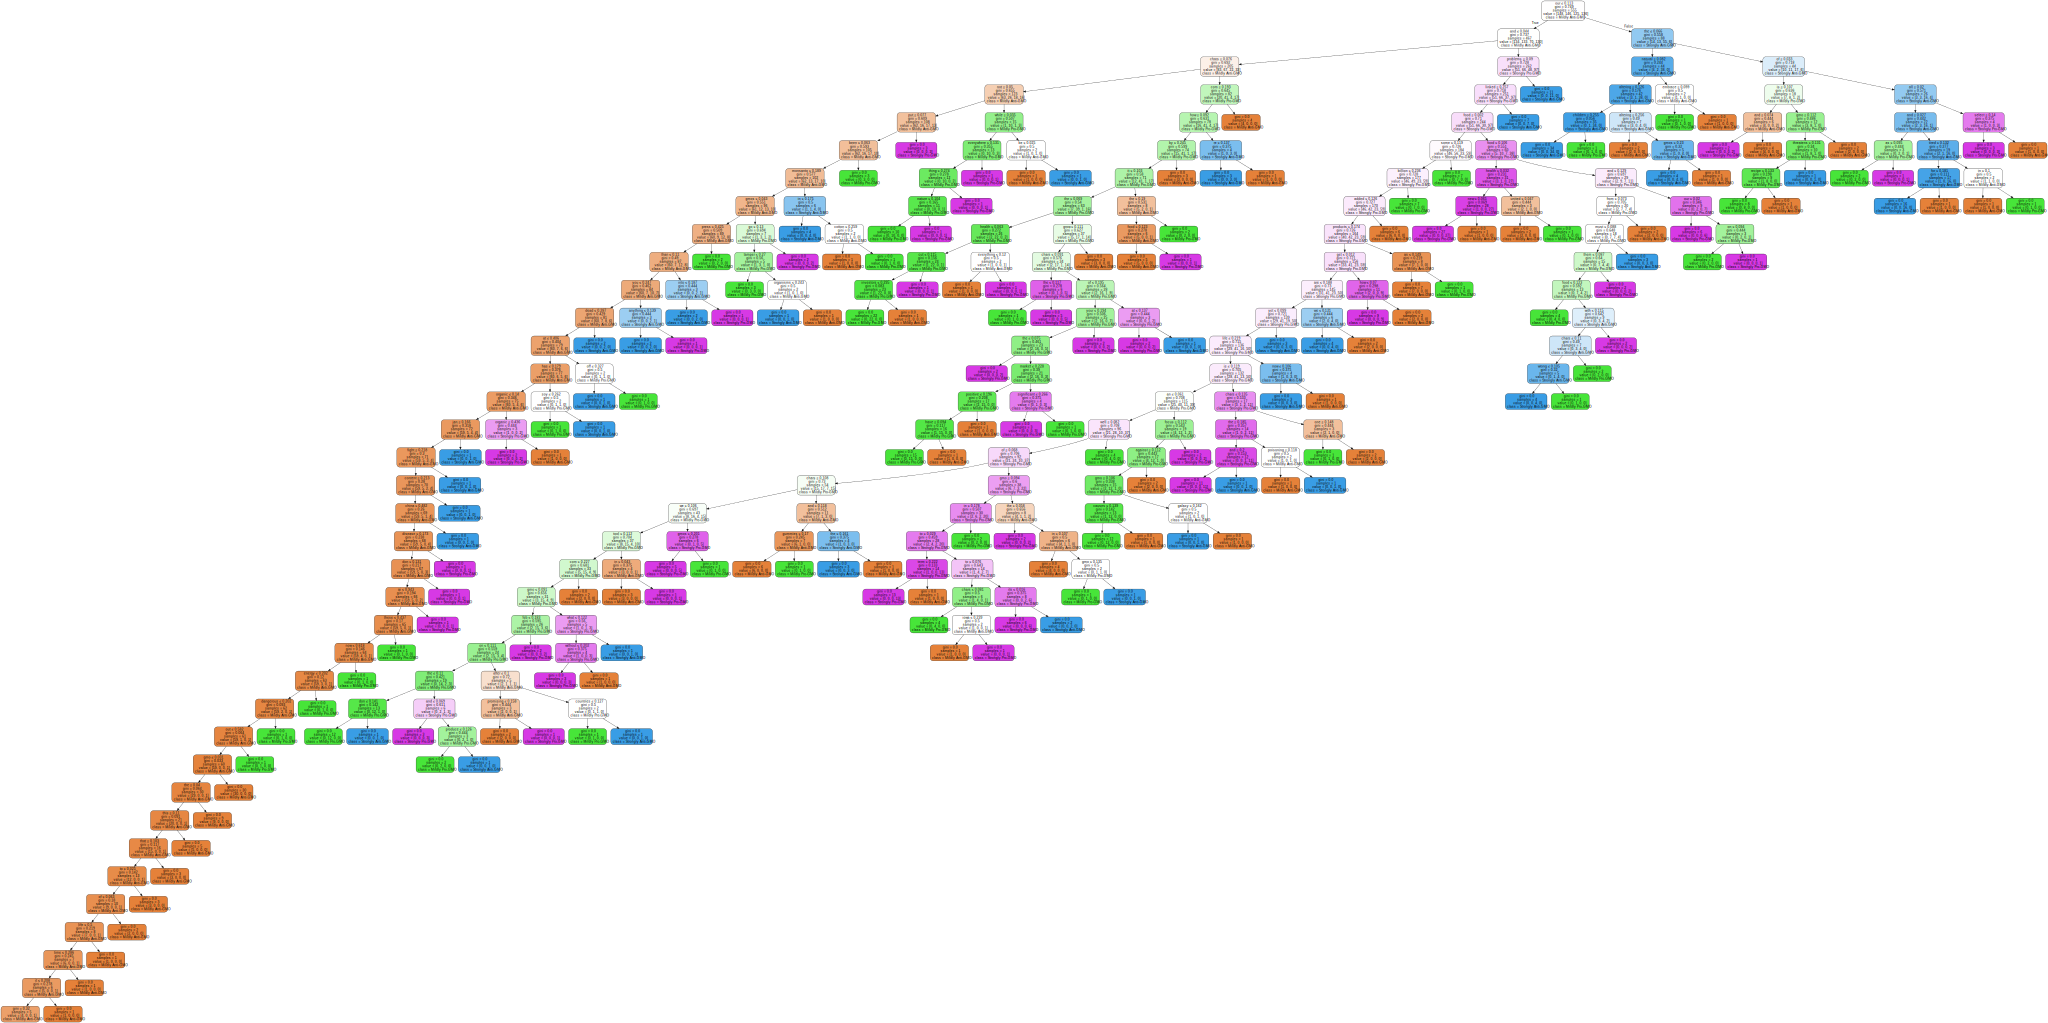


Decision Tree (max_depth=5)
Accuracy: 0.437

Classification Report:
                   precision    recall  f1-score   support

  Mildly Anti-GMO       0.42      0.32      0.36        63
   Mildly Pro-GMO       0.38      0.24      0.29        63
Strongly Anti-GMO       0.64      0.54      0.59        54
 Strongly Pro-GMO       0.38      0.69      0.49        58

         accuracy                           0.44       238
        macro avg       0.45      0.45      0.43       238
     weighted avg       0.45      0.44      0.43       238



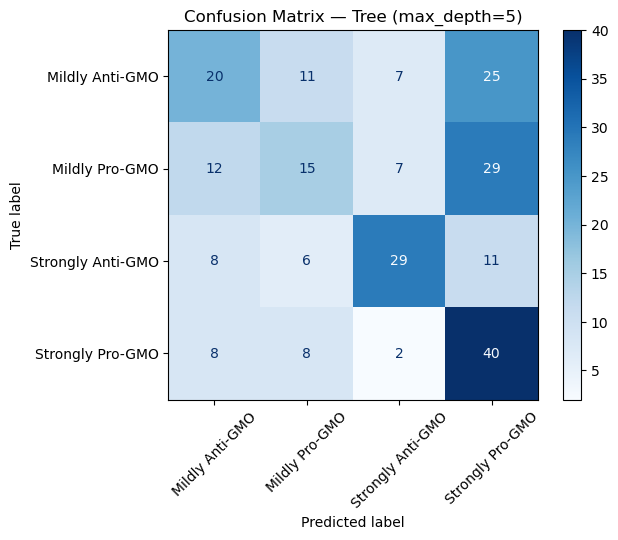

Decision Tree Structure — max_depth=5


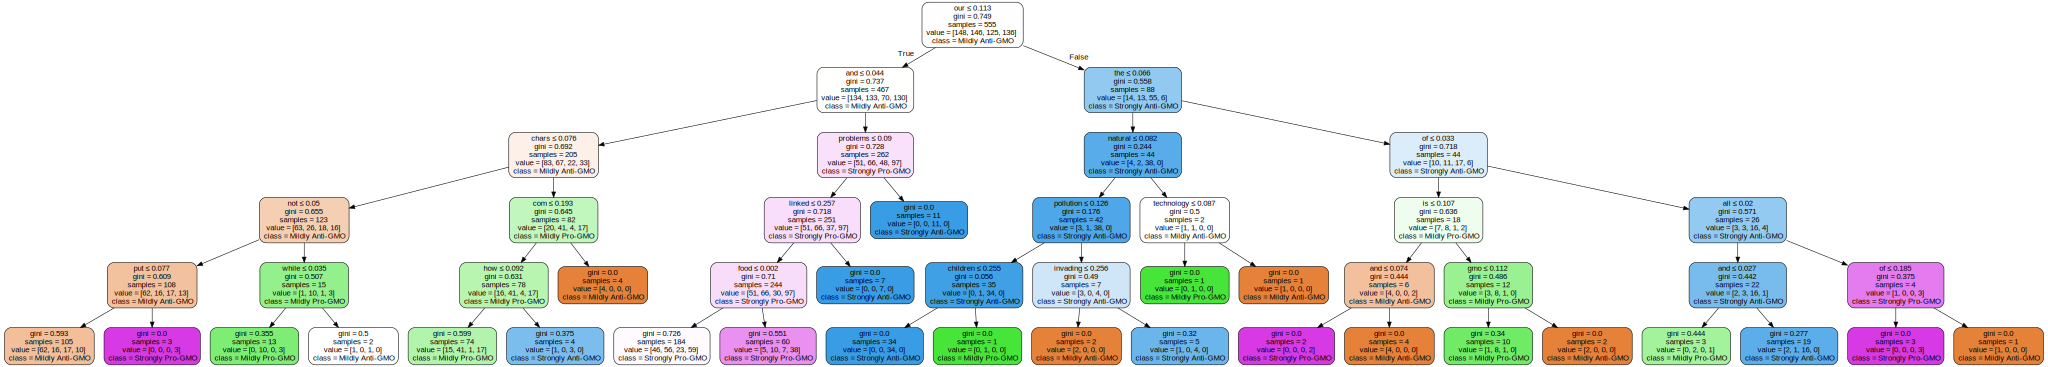


Decision Tree (max_depth=7)
Accuracy: 0.429

Classification Report:
                   precision    recall  f1-score   support

  Mildly Anti-GMO       0.35      0.27      0.31        63
   Mildly Pro-GMO       0.42      0.29      0.34        63
Strongly Anti-GMO       0.60      0.56      0.58        54
 Strongly Pro-GMO       0.38      0.64      0.48        58

         accuracy                           0.43       238
        macro avg       0.44      0.44      0.43       238
     weighted avg       0.43      0.43      0.42       238



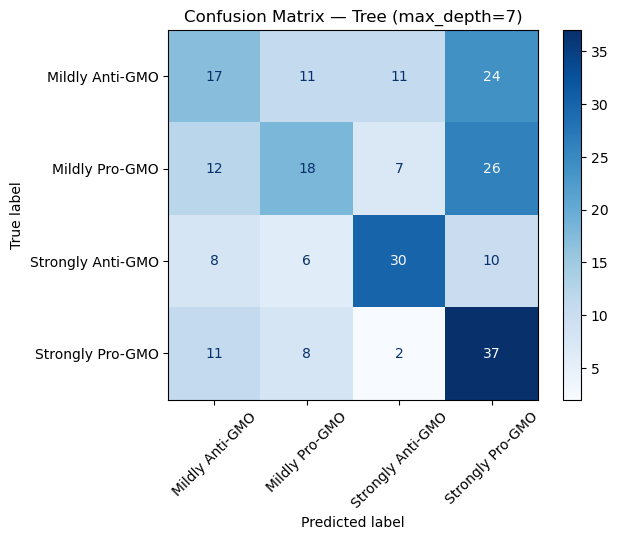

Decision Tree Structure — max_depth=7


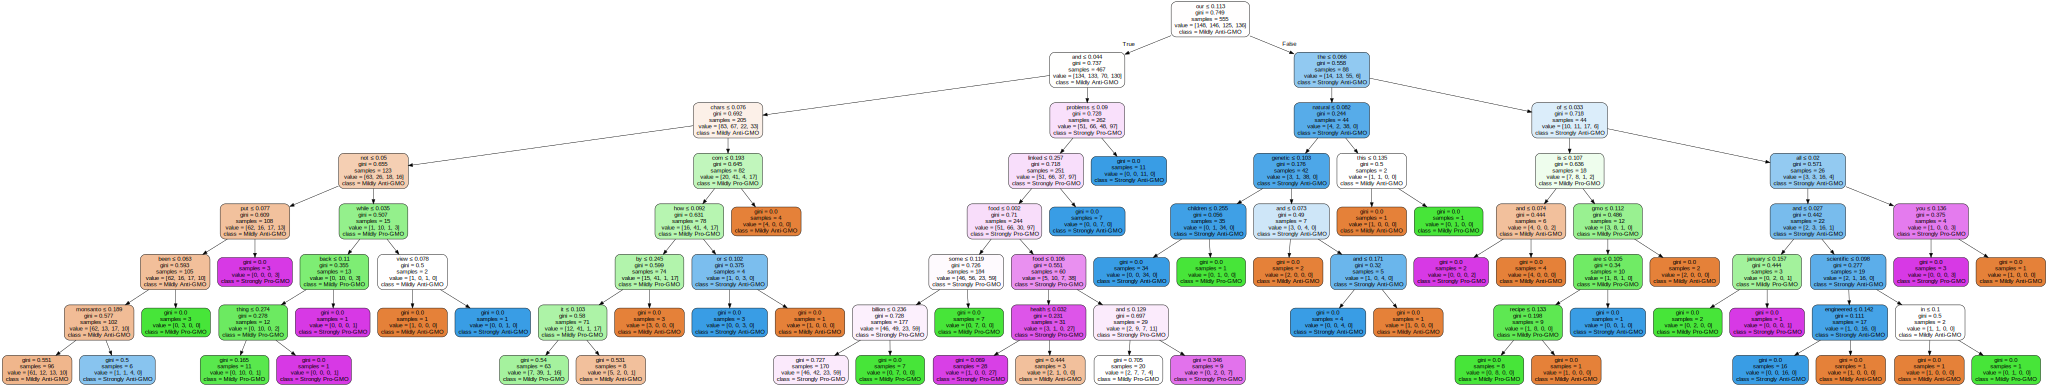

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    confusion_matrix,
    ConfusionMatrixDisplay
)
import graphviz
import matplotlib.pyplot as plt

df = pd.read_csv("df_tfidf.csv")

X = df.drop(columns="label")
y = df["label"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.3,
    random_state=42,
    stratify=y
)

trees = {
    "max_depth=default": DecisionTreeClassifier(random_state=42),
    "max_depth=5": DecisionTreeClassifier(max_depth=5, random_state=42),
    "max_depth=7": DecisionTreeClassifier(max_depth=7, random_state=42),
}

for name, clf in trees.items():
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)

    
    print(f"\nDecision Tree ({name})")
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.3f}\n")
    print("Classification Report:")
    print(classification_report(y_test, y_pred))

    
    cm = confusion_matrix(y_test, y_pred, labels=clf.classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
    disp.plot(cmap="Blues", xticks_rotation=45)
    plt.title(f"Confusion Matrix — Tree ({name})")
    plt.show()

    
    dot_data = export_graphviz(
        clf,
        out_file=None,
        feature_names=X.columns,
        class_names=[str(c) for c in clf.classes_],
        filled=True,
        rounded=True,
        special_characters=True
    )
    
    print(f"Decision Tree Structure — {name}")
    display(graphviz.Source(dot_data))
